In [4]:
%matplotlib inline

#load dependancies
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
import scipy.integrate as integrate
from scipy.io import wavfile
from IPython.display import Audio
from scipy import signal

In [5]:
#Function that will load the data of a WAV file given.
#returns the sampling rate of the song, and the data array itself.

#################  NOTE ##################
#If working with MP3 files, please convert to wav with given conversion file in repository.
#Command for that is "python3 convert.py [songname].mp3 [songname].wav"

def loadData (str):
    rate, data = wavfile.read(str)
    if (len(data.T) > 1):
        data = data.T[0]
    return rate, data

In [25]:
#Function that performs FFT on a randomly sampled portion of data array given.
#Returns the FFT result and the random interval.
def fft (data, intervalSize):
    if (len(data) < intervalSize):
        return None;
    start = np.random.randint(0, len(data) - intervalSize + 1)
    chunked = data[start:(start + intervalSize)]
    interv = (start, start + intervalSize)
    return fftpack.fft(chunked), interv

In [168]:
### load the data, perform FFT.
freq, data = loadData('violin.wav')
sample_rate = 20000

def toRealFreq(f):
    return round(f * (freq / sample_rate))
def toDFTFreq(f):
    return round(f * (sample_rate / freq))

data = np.divide(data, max(data))

print(freq)
print(len(data))
result, randInterval = fft(data, 2**14)
print(2 ** 14)

44100
9363900
16384


506.030273438


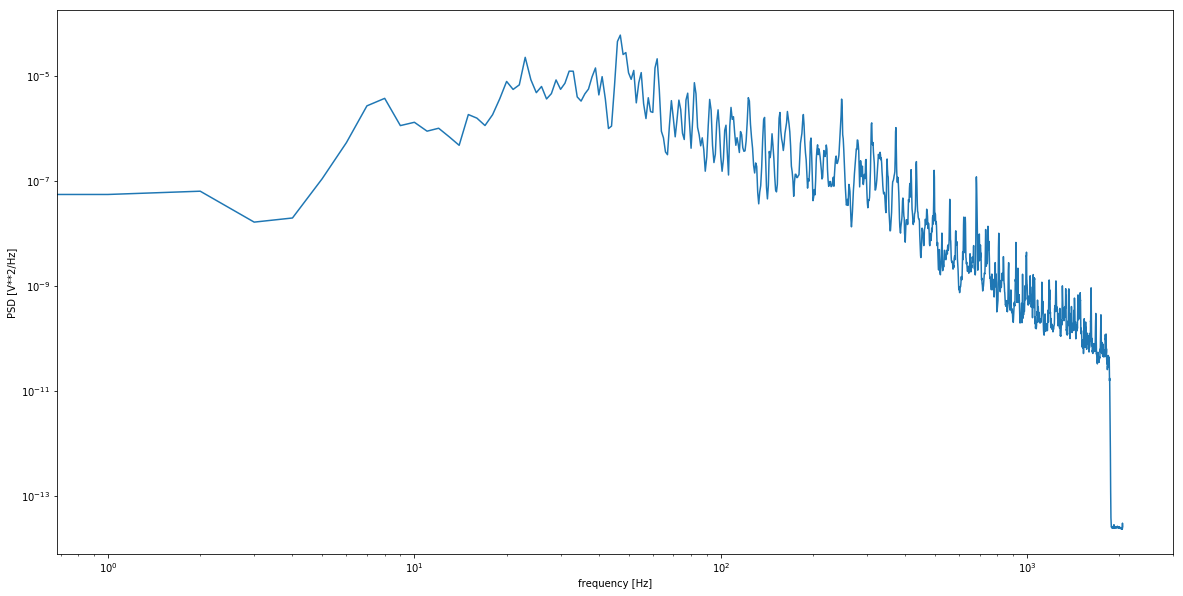

In [169]:
#perform welch's.
FFTLEN = 4096

f, Pxx_den = signal.welch(data, freq, nperseg = FFTLEN)
print(f[Pxx_den.argmax()])
plt.figure(figsize=(20, 10))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.plot(Pxx_den)
plt.show()

powvals = Pxx_den

#digital frequency = k / N
#analog frequency = digital freq * Fs = (k / N) * Fs 
def realFreqConversion(index, samplingrate, N):
    return index * samplingrate / N

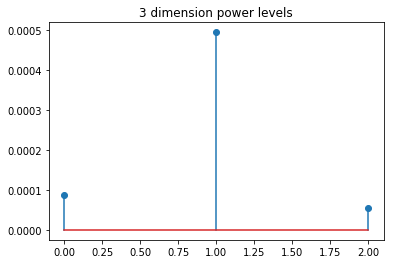

0.000637185565203
bass total: 
13.6183572291
mid total: 
77.7009129399
high total: 
8.68072983098


In [170]:
#0 to 60 subbass
#60  to 300 bass
#300 to 2000 midrange
#2000 to 6000 high mids
#6000-15000 high freqs

#0 to 300 bass
#300 to 6000  mids
#6000-rest high

#find the bass cutoff

realfreqs = [realFreqConversion(index, freq, FFTLEN) for index in range(0, len(Pxx_den))]

basscutoff = 0

while realfreqs[basscutoff] < 300:
    basscutoff += 1

midcutoff = basscutoff

while realfreqs[midcutoff] < 2000:
    midcutoff += 1

highcutoff = len(realfreqs)

b = integrate.trapz(powvals[0:basscutoff])
m = integrate.trapz(powvals[basscutoff: midcutoff])
h = integrate.trapz(powvals[midcutoff: highcutoff])

arr2 = [b, m, h]

plt.stem(arr2)
plt.title("3 dimension power levels")
plt.show()

total = b + m + h
print(total)
print("bass total: ")
print(b / total * 100)
print("mid total: ")
print(m / total * 100)
print("high total: ")
print(h / total * 100)

In [171]:
#Here is the randomly sampled portion of the song.
#Feel free to listen.
Audio(data[randInterval[0]:randInterval[1]], rate= freq)

In [172]:
#Here is the whole song.
Audio(data[0:len(data)//16], rate = freq)

In [ ]:
#what headphones are you lookng for? in ear, on ear, etc.

#NEUTRAL, BASSY, V SHAPE, MID FORWARD



